# 19기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocessing / EDA

In [2]:
df.isnull().sum()
#결측치가 없는 데이터이다.

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [3]:
for col in df:
    print(pd.unique(df[col]))

#Gender는 범주형 데이터이므로 원핫 인코딩 처리한다.

['Male' 'Female']
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]
[ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137]
[39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]


In [4]:
df = pd.get_dummies(df, columns = ['Gender'])
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
1,19,15,39,0,1
2,21,15,81,0,1
3,20,16,6,1,0
4,23,16,77,1,0
5,31,17,40,1,0


(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

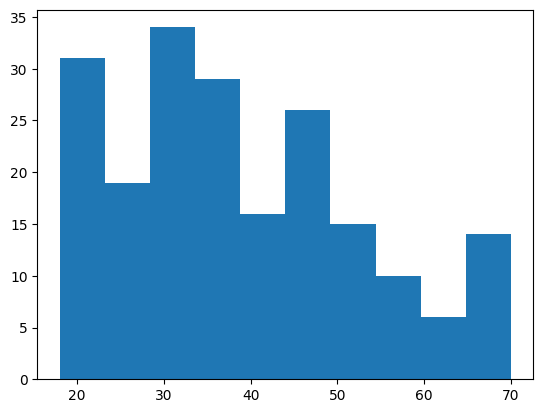

In [5]:
import matplotlib.pyplot as plt
plt.hist(df.Age)

In [6]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

(array([18.,  6., 12., 10., 12., 16., 14., 24., 12., 18., 22., 14.,  2.,
         6.,  6.,  0.,  2.,  2.,  2.,  2.]),
 array([ 15. ,  21.1,  27.2,  33.3,  39.4,  45.5,  51.6,  57.7,  63.8,
         69.9,  76. ,  82.1,  88.2,  94.3, 100.4, 106.5, 112.6, 118.7,
        124.8, 130.9, 137. ]),
 <BarContainer object of 20 artists>)

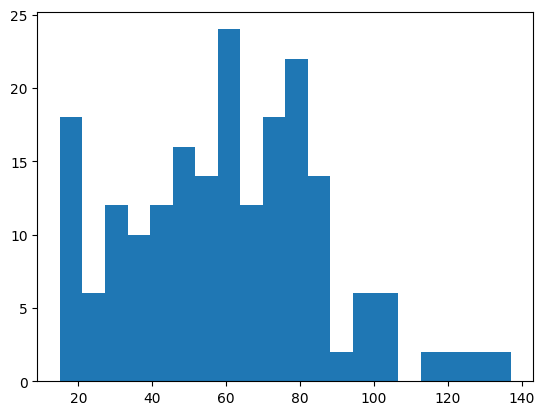

In [7]:
import matplotlib.pyplot as plt
plt.hist(df['Annual Income (k$)'], bins=20)
#정규분포에 가까워지도록 log를 취해보겠다. 

In [8]:
from scipy.stats import kurtosis, skew

#왜도
skew_val = skew(df['Annual Income (k$)'])
#첨도
kurtois = kurtosis(df['Annual Income (k$)'], fisher=True)
print(skew_val, kurtois)

#왜도의 절댓값이 3, 첨도의 절댓값이 8을 초과하지 않으므로 정규분포로 생각해도 좋다.(Kline(2005))

0.319423684276314 -0.1258928297475106


(array([ 9.,  7., 12.,  8.,  3.,  7.,  9.,  8., 17., 18., 17., 20.,  6.,
         5., 11., 13.,  5.,  9., 10.,  6.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <BarContainer object of 20 artists>)

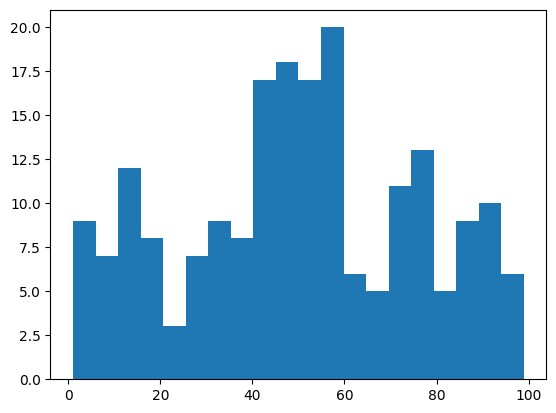

In [9]:
plt.hist(df['Spending Score (1-100)'], bins=20)

In [10]:
#왜도
skew_val = skew(df['Spending Score (1-100)'])
#첨도
kurtois = kurtosis(df['Spending Score (1-100)'], fisher=True)
print(skew_val, kurtois)

#왜도의 절댓값이 3, 첨도의 절댓값이 8을 초과하지 않으므로 정규분포로 생각해도 좋다.(Kline(2005))

-0.04686530945553505 -0.8359582718737237


In [11]:
#Income, Spending Score를 표준화하겠다.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.tail()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
196,35,120,79,1,0
197,45,126,28,1,0
198,32,126,74,0,1
199,32,137,18,0,1
200,30,137,83,0,1


In [12]:
data = df.drop(['Gender_Female', 'Gender_Male'], axis = 1)
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


In [13]:
scaler.fit(data)
X_data = scaler.transform(data)
X_data = pd.DataFrame(X_data)

X_data['Gender'] = df['Gender_Female'].to_numpy().reshape(-1, 1)
X_data.head() #남성이면 0, 여성이면 1

,0,1,2,Gender
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,1
3,-1.137502,-1.700830,1.040418,1
4,-0.563369,-1.662660,-0.395980,1


In [14]:
X_data.rename(columns={0:'Age', 1:'Income', 2:'SpendingScore'}, inplace=True)
X_data.head()

,Age,Income,SpendingScore,Gender
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,1
3,-1.137502,-1.700830,1.040418,1
4,-0.563369,-1.662660,-0.395980,1


In [15]:
X_data.corr()

,Age,Income,SpendingScore,Gender
Age,1.000000,-0.012398,-0.327227,-0.060867
Income,-0.012398,1.000000,0.009903,-0.056410
SpendingScore,-0.327227,0.009903,1.000000,0.058109
Gender,-0.060867,-0.056410,0.058109,1.000000


## 2. Clustering

In [16]:
#Feature Ablation
#특성을 하나씩 빼가면서, 필요한 특성집합을 도출하겠다.

#1. 모든 Feature를 모두 활용한 KMeans
X = X_data
X.head()

,Age,Income,SpendingScore,Gender
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,1
3,-1.137502,-1.700830,1.040418,1
4,-0.563369,-1.662660,-0.395980,1


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_cluster = []
sse = []
sil_score = []
for n in range(3, 15, 2):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    n_cluster += [n]
    sse += [kmeans.inertia_]
    sil_score += [silhouette_score(X, kmeans.predict(X))]

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

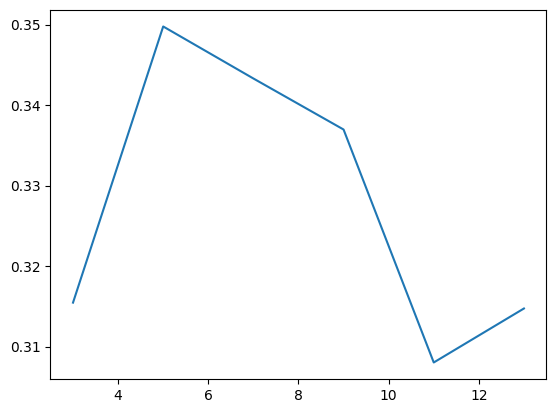

In [18]:
plt.plot(n_cluster, sil_score) #n = 5에서 silhouette score가 가장 높긴 하나, 0.5가 넘는 경우는 하나도 없다.

In [19]:
#2. 범주형 변수인 Gender를 제외
X = X_data.drop(['Gender'], axis = 1)
X.head()

,Age,Income,SpendingScore
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [20]:
n_cluster = []
sse = []
sil_score = []
for n in range(3, 15, 2):
    kmeans1 = KMeans(n_clusters=n)
    kmeans1.fit(X)
    n_cluster += [n]
    sse += [kmeans1.inertia_]
    sil_score += [silhouette_score(X, kmeans1.predict(X))]

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

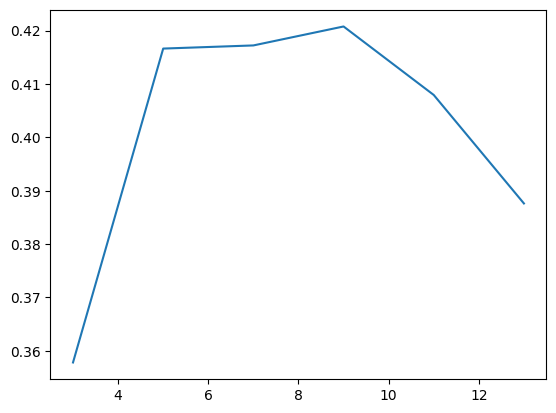

In [21]:
plt.plot(n_cluster, sil_score) 
#n = 9에서 silhouette score가 가장 높긴 하나, 0.5가 넘는 경우는 하나도 없다.
#그러나 모든 특성을 사용했을 때에 비해 실루엣 계수 최댓값이 0.07가량 상승했다.

In [22]:
#Age를 drop
X = X_data.drop(['Age'], axis = 1)
X.head()

,Income,SpendingScore,Gender
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,1
3,-1.700830,1.040418,1
4,-1.662660,-0.395980,1


In [23]:
n_cluster = []
sse = []
sil_score = []
for n in range(3, 15, 2):
    kmeans2 = KMeans(n_clusters=n)
    kmeans2.fit(X)
    n_cluster += [n]
    sse += [kmeans2.inertia_]
    sil_score += [silhouette_score(X, kmeans2.predict(X))]

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

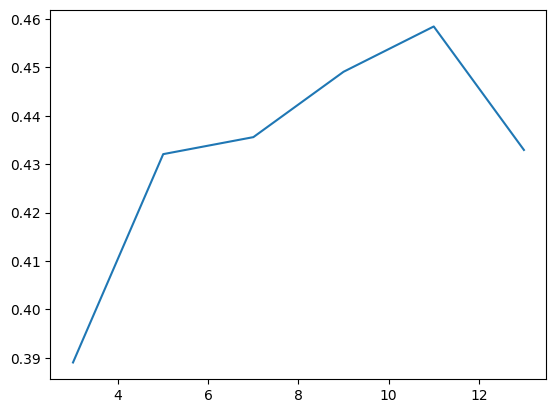

In [24]:
plt.plot(n_cluster, sil_score) 
#n = 11에서 silhouette score가 가장 높긴 하나, 0.5가 넘는 경우는 하나도 없다.
# 그러나 모든 특성을 사용했을 때에 비해 실루엣 계수 최댓값이 0.1가량 상승했다.

In [25]:
#Income을 drop
X = X_data.drop(['Income'], axis = 1)
X.head()

,Age,SpendingScore,Gender
0,-1.424569,-0.434801,0
1,-1.281035,1.195704,0
2,-1.352802,-1.715913,1
3,-1.137502,1.040418,1
4,-0.563369,-0.395980,1


In [26]:
n_cluster = []
sse = []
sil_score = []
for n in range(3, 21, 2):
    kmeans3 = KMeans(n_clusters=n)
    kmeans3.fit(X)
    n_cluster += [n]
    sse += [kmeans3.inertia_]
    sil_score += [silhouette_score(X, kmeans3.predict(X))]

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

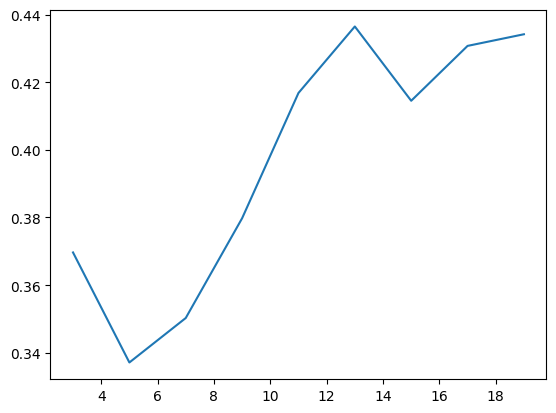

In [27]:
plt.plot(n_cluster, sil_score) 
#n=17에서 최댓값이 0.44

In [28]:
#SpendingScore을 drop
X = X_data.drop(['SpendingScore'], axis = 1)
X.head()

,Age,Income,Gender
0,-1.424569,-1.738999,0
1,-1.281035,-1.738999,0
2,-1.352802,-1.700830,1
3,-1.137502,-1.700830,1
4,-0.563369,-1.662660,1


In [29]:
n_cluster = []
sse = []
sil_score = []
for n in range(3, 31, 2):
    kmeans4 = KMeans(n_clusters=n)
    kmeans4.fit(X)
    n_cluster += [n]
    sse += [kmeans4.inertia_]
    sil_score += [silhouette_score(X, kmeans4.predict(X))]

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

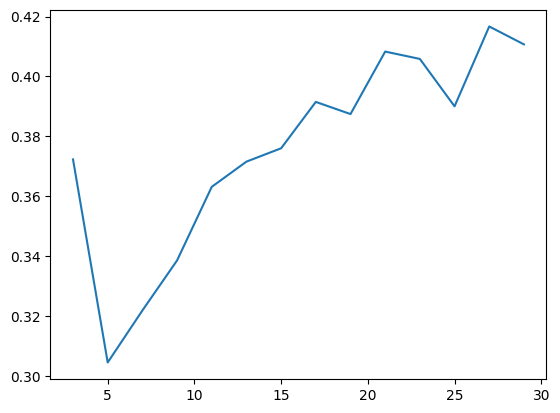

In [30]:
plt.plot(n_cluster, sil_score) 
#실루엣계수에 근거한 군집화 성능이 더 떨어졌음을 확인할 수 있다.

In [34]:
#DBSCAN을 이용한 군집화

from sklearn.cluster import DBSCAN
dbscan1 = DBSCAN(eps=0.5, min_samples=2)
dbscan1.fit(X_data)
cluster = dbscan1.fit_predict(X_data)

In [35]:
silhouette_score(X_data, cluster)
#DBSCAN 알고리즘에 의한 군집화 성능에서 처음으로 실루엣 계수에 근거한 성능이 0.5를 넘었다.

0.5558536900533816

In [39]:
#Hierarchical Clustering을 이용한 군집화 성능
from sklearn.cluster import AgglomerativeClustering

In [45]:
n_cluster = []
sil_score = []
for n in range(3, 31, 2):
    hiclus = AgglomerativeClustering(n_clusters=n, linkage='ward')
    hiclus.fit(X_data)
    n_cluster += [n]
    sil_score += [silhouette_score(X_data, hiclus.fit_predict(X_data))]

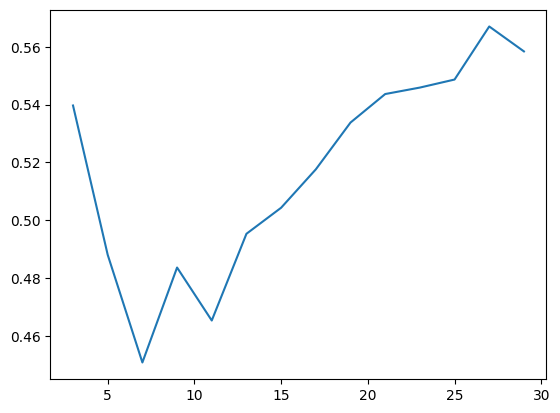

In [46]:
plt.plot(n_cluster, sil_score) 
#실루엣계수에 근거한 군집화 성능이 0.5를 상회함을 알 수 있다. n = 27에서 성능이 극대화된다.